# 2. házi feladat

A második házi feladat keretében egy egyszerű képi objektum-detektort készítünk, amivel megtanuljuk megoldani a "Hová tűnt Vili?" ("Where's Waldo?") rejtvényeket. Ennek keretében, nagy méretű képeken kell megtalálni a főhőst, Vilit. Az objektum-detektort egy bináris kép-klasszifikációra ("van Vili" / "nincs Vili"), képrészleteken betanított konvolúciós háló segítségével valósítjuk meg. A háló betanítását követően, a nagyméretű Vili képrejtvényeinket, felosztjuk kisebb négyzetekre, majd az így kapott képrészletek klasszifikációjával próbáljuk meg megtalálni a képeken Vilit.

Sajnos kevés ilyen képrejtvény áll rendelkezésünkre, így néhány kézzel rajzolt, kivágott Vili-fejből és véletlen hátterekből összerakott szintetikus példák segítségével tanítjuk be a klasszifikációs hálónkat. Ezeket a szintetikus példákat két függvény generálja majd: az egyik Vili-ket tartalmazó (pozitív) képeket, a másik Vili nélküli (negatív) képeket generál. A neuronhálónk alapját egy, az ImageNet adatbázison előtanított mély konvolúciós háló (MobileNet v2) adja.

A házi feladat több részfeladatból áll (A - J), melyek egymásra épülnek. A feladat automatikus tesztelőszkripttel rendelkezik és vizsgálja az egyes részfeladatokra adott megoldások helyességét. Éppen ezért, **ne változtasd meg a notebook struktúráját**, ne szedd több részre, illetve ne módosítsd a megírt részeket, csak a megoldásaidat írd be a megfelelő helyre, különben nem fogjuk tudni értékelni! A megoldások az `# Implement your solution BELOW` és `# Implement your solution ABOVE` sorok közé írandók. Ha a megoldott részfeladatok futtatásakor a "Tester: .... OK" felirat megjelenik, a tesztelő által lefuttatott tesztek sikeresek voltak. Azonban, a tesztelőszkript nem képes a megoldás helyességét minden szempont szerint ellenőrizni. A kód ellenőrzésére szolgálnak a vizualizációs feldatok is, ahol a kirajzolt képek szemrevételezésével is kiszűrhetők hibák. Mindezek ellenére, nem minden fajta hibát könnyű észrevenni a kódban, így elképzelhető, hogy beadás után további javításokat kérünk a megoldásban. A beadott házi feladatok gépi tanulás alapú plágiumellenőrzésen esnek át. Másolás gyanújának felmerülése esetén mind a másolat(ok), mind az azt/azokat ihlető eredeti megoldások visszautasíthatók.

**!!! A feladatok megoldását tilos közzétenni !!!**

Elakadás esetén javasolt átnézni a Canvason megosztott segédanyag notebookokat és videókat, illetve az előadások anyagát. A Canvas fórumon "HF2 GYIK" névvel, a gyakori kérdéseket és válaszokat gyűjtjük össze. Továbbá, kérhető segítség az oktatóktól is, például a Teams rendszeren keresztül. Ehhez, kérjük a kurzus Canvas oldalán a legfelső modulban található _"
Teams beszélgetés indítása az oktatókkal"_ linket használni: ez egy Teams beszélgetést kezdeményez az összes oktatóval egyidejűleg.

**Megoldás és beküldés menete:**

A közzétett, feladatokat tartalmazó Jupyter notebook a Google Drive-on keresztül lett megosztva, így a Google saját Jupyter notebook szerkesztője és futtatókörnyezete nyílik meg a linkre kattintáskor, a Google Colab. Ennek segítségével online szerkeszthető és futtatható a megosztott notebook. Mivel a notebook csak "view" jogosultságokkal van megosztva, a Google Colab az úgynevezett "Playground" módban nyitja azt meg, ahol bár szerkeszthető és futtatható a notebook, de a változtatások nem lesznek automatikusan mentve. A notebook maradandó hatásokkal járó szerkesztése az alábbi módokon lehetséges:
- Javasolt a notebook-ot letölteni (.ipynb fájl) és a saját számítógépen telepített Python környezettel, `jupyterlab`, vagy `notebook` csomagok segítségével használni, hiszen a ZH alatt is ilyen környezettel kell majd dolgozni. További információk erről a környezetről a "Szoftveres anyag - Python környezet infók" videóban találhatók, Canvason. A szükséges csomagok telepítéséhez felhasználható a Canvas-ban, a "ZH Python környezet (requirements.txt)" link alatt lévő fájl is.
- Ha online szeretnénk a notebookot szerkeszteni és futtatni a Google Colab segítségével, akkor le kell másolni azt a saját Drive tárhelyre (Google Colab file menü -> Save a copy to Drive), majd a másolatot kell megnyitni szerkesztésre. Az így készült megoldás letölthető és beadható. A ZH alatt azonban a Google Colab nem lesz elérhető.

A kész megoldást tartalmazó notebookot (.ipynb) fájlként kell feltölteni a Canvas-ban, a házi feladat beadási felületén.
**Kérjük a notebook szerkezetét nem módosítani és nem szétszedni külön feladatok szerint!**

**Határidő:** 2025. május 18., vasárnap, 23:59.

**Késve legkésőbb leadható:** 2025. május 23., péntek, 23:59. - **Ezt követően pótlásra és/vagy javításra nincs lehetőség, ezáltal jegyszerzésre sem. !!!**

**Értékelés:** A házi feladat helyes megoldása és oktatók által történő elfogadása feltétele a jegyszerzésnek. A házi feladat minősége részletesen pontozásra nem kerül, az értékelése kétfokozatú: megfelelt / nem felelt meg. Az első határidőig leadott nagyrészt helyes és nagyrészt teljes ("megfelelt") megoldásért 5 pont jár. Késés esetén ez elveszik.

**Megjegyzés:** A házi feladat megoldásához nem szükséges GPU. A javasolt hálóarchitektúra egy átlagos laptop processzoron is kb. 5 perc alatt rendesen betanul, a MobileNet súlyok befagyasztása nélkül is.

**Kikötés:** Ahol csak lehet, hatékony, vektorizált megoldásokat várunk. További részletekért lásd: Canvas, HF2 GYIK fórum, "Használhatók-e Python ciklusok?" bejegyzés.


Tesztelő szkript letöltése, importok.
*   Ha nem Google Colab-on dolgozol, elképzelhető, hogy nem fognak működni a lenti `!rm` és `!wget` parancsok. Ebben az esetben, töltsd le az alábbi cellában látható URL-en található tesztelő szkriptet, majd helyezd el a jelen notebook fájlja mellé!

In [1]:
# Download tester
#!rm annbsc25_p1_hw2_tester.py
#!wget https://nipg12.inf.elte.hu/~vavsaai@nipg.lab/annbsc25_p1/files/annbsc25_p1_hw2_tester.py

import os
import PIL
from PIL import Image
import io
import time
import json
import copy
import numpy as np
import skimage
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import transforms
import torchvision.transforms.v2

import matplotlib.pyplot as plt
import matplotlib.patches

from annbsc25_p1_hw2_tester import Tester
tester = Tester()

Az adatbázis letöltése és kicsomagolása.
*   Ha nem Google Colab-on dolgozol, elképzelhető, hogy nem fognak működni a lenti `!wget` és `!unzip` parancsok. Ebben az esetben, töltsd le az alábbi cellában látható URL-en található .zip fájlt, majd csomagold ki a tartalmát a jelen notebook fájlja mellé!

In [ ]:
# on Google Colab:
!wget -nc https://nipg12.inf.elte.hu/~vavsaai@nipg.lab/annbsc25_p1/files/waldo_annbsc25_p1_hw2.zip
!unzip -nq waldo_annbsc25_p1_hw2.zip               # This will not overwrite files already unpacked on the disk. If you need to overwrite, remove the '-n' flag, e.g., '!unzip -q'

Betöltjük a kicsomagolt .zip fájl tartalmát:

In [2]:
# load puzzle images & bboxes info json
puzzle_im_waldo_bboxes_fpath = os.path.join('.', 'waldo', 'puzzle_im_waldo_bboxes.json')
with open(puzzle_im_waldo_bboxes_fpath, 'r') as f:
    puzzle_im_waldo_bboxes_dict = json.load(f)

# load puzzle images
puzzle_images_dict = {}     # dict{image_fname - str: image - ndarray(sy, sx, 3:RGB) ui8}
for puzzle_im_fname in puzzle_im_waldo_bboxes_dict.keys():
    puzzle_im_fpath = os.path.join('.', 'waldo', 'puzzle_images', puzzle_im_fname)
    pil_image = Image.open(puzzle_im_fpath)
    npy_image = np.asarray(pil_image)
    assert npy_image.dtype == np.uint8
    assert npy_image.shape[2:] == (3,)
    puzzle_images_dict[puzzle_im_fname] = npy_image

# load waldo head cutouts
waldo_head_images_dict = {}     # dict{image_fname - str: image - ndarray(sy, sx, 4:RGBA) ui8}
for waldo_im_idx in range(12):
    waldo_im_fname = f"waldo_head{waldo_im_idx}.png"
    waldo_im_fpath = os.path.join('.', 'waldo', 'waldo_heads', waldo_im_fname)
    pil_image = Image.open(waldo_im_fpath)
    npy_image = np.asarray(pil_image)
    assert npy_image.dtype == np.uint8
    assert npy_image.shape[2:] == (4,)
    waldo_head_images_dict[waldo_im_fname] = npy_image

Az adatbázis a következőkből áll:
- `puzzle_images_dict`: 22 darab nagy méretű Vili képrejtvény egy szótárban. A szótár kulcsai az egyes képek fájlnevei (sztringek, pl. `waldo28.jpg`), az értékei pedig maguk a képek, `(height, width, 3)` alakú NumPy tömbökben, ahol az egyes képek méretei eltérőek. A hátsó tengely az RGB színcsatornákat sorolja fel.
- `puzzle_im_waldo_bboxes_dict`: A nagy méretű Vili képrejtvények képméretét és a rajtuk fellelhető Vili pozícióját (bounding box / bennfoglaló téglalap formában) tárolja egy szótárban. A szótár kulcsai az egyes képek fájlnevei (sztringek, pl. `waldo28.jpg`), az értékei pedig újabb szótárak az alábbi kulcsokkal: "im width", "im height", "bbox left", "bbox top", "bbox width", "bbox height". Az első kettőhöz tartozó értékek tárolják a nagy méretű Vili képrejtvény kép szélességét és magasságát, a többi négyhez tartozó értékek pedig Vili bounding box-ának a bal és felső határait, valamint szélességét és magasságát. A bounding box-ok oldalai mindig párhuzamosak valamelyik tengellyel. A szótárak szerkezete könnyebben átlátható a kicsomagolt .json fájl manuális vizsgálatával.
- `waldo_head_images_dict`: 12 darab átlátszósággal (alfa csatornával) rendelkező, kivágott Vili-fejeket ábrázoló képeket tartalmazó szótár. A szótár kulcsai az egyes képek fájlnevei (sztringek, pl. `waldo_head0.jpg`), az értékei pedig maguk a képek, `(height, width, 4)` alakú NumPy tömbökben. A hátsó tengely az RGBA színcsatornákat sorolja fel. Az utolsó színcsatorna kódolja a pixelek átlátszóságát. A 255-ös érték teljes átlátszatlanságot, a 0-s érték pedig teljes átlátszóságot jelent. A köztes értékek részleges átlátszóságot jelölnek. Ezen képek mindegyike azonos méretű, 100 x 100 pixel felbontású.

In [4]:
# print example puzzle image shape & dtype
example_puzzle_im_name = list(puzzle_images_dict.keys())[0]
example_puzzle_im = puzzle_images_dict[example_puzzle_im_name]
print(f"Example puzzle image ({example_puzzle_im_name}) shape is {example_puzzle_im.shape}, dtype is {example_puzzle_im.dtype}.")

# print example image size & waldo bbox:
print(f"\nEntry in 'puzzle_im_waldo_bboxes_dict' corresponding to the example puzzle image ({example_puzzle_im_name}):", puzzle_im_waldo_bboxes_dict[example_puzzle_im_name])

# print example waldo head image shape & dtype
example_waldo_head_name = list(waldo_head_images_dict.keys())[0]
example_waldo_head_im = waldo_head_images_dict[example_waldo_head_name]
print(f"\nExample Waldo head image ({example_waldo_head_name}) shape is {example_waldo_head_im.shape}, dtype is {example_waldo_head_im.dtype}.")


Example puzzle image (1.jpg) shape is (1251, 2048, 3), dtype is uint8.

Entry in 'puzzle_im_waldo_bboxes_dict' corresponding to the example puzzle image (1.jpg): {'im width': 2048, 'im height': 1251, 'bbox left': 706, 'bbox top': 513, 'bbox width': 37, 'bbox height': 50}

Example Waldo head image (waldo_head0.png) shape is (100, 100, 4), dtype is uint8.


###**A**: Képek és bounding box kirajzolása

Elsőként belenézünk a letöltött adatbázis tartalmába.
- **Rajzolj ki egyet a nagy méretű Vili képrejtvények közül** (a `puzzle_images_dict` szótárból) és **rajzold rá a** hozzá tartozó, **Vilit megjelölő bounding box-ot**! Utóbbi pozícióját és méreteit a `puzzle_im_waldo_bboxes_dict`-ben találod meg. Javasolt feltűnő színt használni a téglalap kirajzolásához.
- **Rajzolj ki egyet a kivágott Vili fejek közül** (a `waldo_head_images_dict` szótárból)!

{'im width': 2048, 'im height': 1251, 'bbox left': 706, 'bbox top': 513, 'bbox width': 37, 'bbox height': 50}


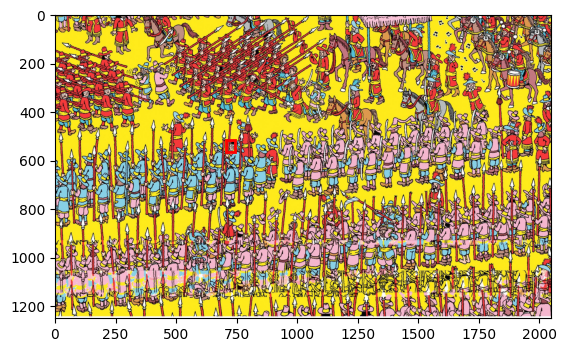

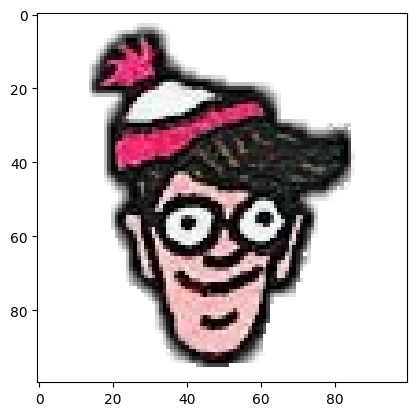

In [5]:
# implement your solution BELOW
import matplotlib.patches as patches

idx=4
puzzle_im_name = list(puzzle_images_dict.keys())[idx]
waldo_head_name = list(waldo_head_images_dict.keys())[idx]

puzzle_im = puzzle_images_dict[example_puzzle_im_name]
bbox = puzzle_im_waldo_bboxes_dict[example_puzzle_im_name]
waldo_head_im = waldo_head_images_dict[example_waldo_head_name]
print(bbox)

fig, ax = plt.subplots()
ax.imshow(puzzle_im)
rect = patches.Rectangle((bbox['bbox left'], bbox['bbox top']), bbox['bbox width'], bbox['bbox height'], linewidth=2, edgecolor='red', facecolor='none')
ax.add_patch(rect)
plt.show()

plt.imshow(waldo_head_im)
plt.show()


###**B**: Pozitív szintetikus példákat generáló függvény

Elsőként egy olyan függvényt kell definiálnunk, ami kivág egy megadott méretű képrészletet egy megadott teljes képrejtvény képből, majd egy megadott, kivágott Vili fejet tartalmazó, részben átlátszó képet véletlen pozícióban ráhelyez a háttérként használt képrészletre. Ez a függvény fogja majd a Vilit tartalmazó, pozitív példákat adni a hálónk tanításához. Mivel a különböző képrejtvényeken megjelenő Vili változatos méretű lehet, a szintetikus példáinkban is törekszünk erre: a kivágott fejet a képrészletre illesztés előtt átméretezzük.

Definiáld a `create_random_positive_sample` függvényt, mely sorban az alábbi paramétereket fogadja:
- `puzzle_image`: Egy teljes Vili képrejtvényt tartalmazó kép, NumPy tömbként, `(magasság, szélesség, csatornák_száma=3)` alakban, `np.uint8` adattípussal.
- `waldo_head_image`: Egy kivágott Vili-fejet tartalmazó kép, NumPy tömbként, `(magasság, szélesség, csatornák_száma=4)` alakban, `np.uint8` adattípussal. A kép negyedik csatornája az átlátszóságot kódolja, a notebook elején leírtak szerint.
- `waldo_head_scale`: Egy `float` típusú érték, ami megadja, hogy a Vili-fejet tartalmazó képet, a háttérre illesztés előtt milyen arányban kell átméretezni. Ha ez például 0.5, a `waldo_head_image` képet először mindkét tengely szerint fele akkorára kell átméretezni (lásd HF2 GYIK), majd ezt követően kell ráilleszteni a képre.
- `im_out_size_yx`: Egy kételemű, integer értékeket tartalmazó tuple, ami megadja, hogy a visszaadott képkivágás mekkora legyen (magasság, szélesség sorrenddel).

A függvény térjen vissza egy, a `puzzle_image` képből véletlenszerű helyről kivágott képpel, melyre kerüljön rá a `waldo_head_image` kép a `waldo_head_scale` érték szerint újraméretezve, véletlen pozícióba, úgy, hogy Vili feje lehetőleg ne lógjon le nagy mértékben a képről. A tömb alakja legyen `(im_out_size_yx[0], im_out_size_yx[1], 3)`, adattípusa `np.uint8`!

shape: (256, 256, 3)
dtype: uint8


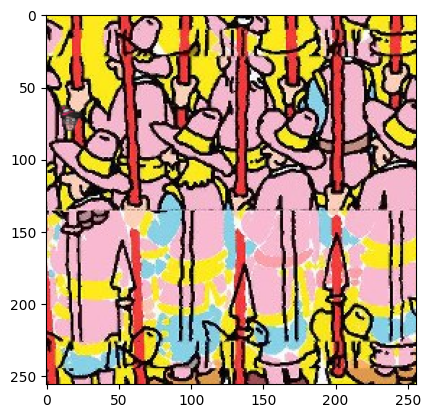


Tester: Task B solution seems OK


In [6]:
# implement your solution BELOW
def create_random_positive_sample(puzzle_image, waldo_head_image, waldo_head_scale, im_out_size_yx):
    from skimage.transform import resize
    from skimage import img_as_ubyte

    out_height, out_width = im_out_size_yx
    img_height, img_width, _ = puzzle_image.shape
    max_y = img_height - out_height
    max_x = img_width - out_width
    random_start_y = np.random.randint(0, max_y + 1)
    random_start_x = np.random.randint(0, max_x + 1)
    crop_img = puzzle_image[random_start_y:random_start_y + out_height,
                            random_start_x:random_start_x + out_width].copy()

    new_h = int(waldo_head_image.shape[0] * waldo_head_scale)
    new_w = int(waldo_head_image.shape[1] * waldo_head_scale)
    resized_waldo_head = resize(waldo_head_image, (new_h, new_w, 4),
                                anti_aliasing=True,
                                preserve_range=True)

    max_y = out_height - new_h
    max_x = out_width - new_w
    random_start_y = np.random.randint(0, max_y + 1)
    random_start_x = np.random.randint(0, max_x + 1)

    waldo_rgb = resized_waldo_head[:, :, :3]
    alpha = resized_waldo_head[:, :, 3].astype(np.float32) / 255.0
    alpha = alpha[:, :, None]

    crop_img[random_start_y:random_start_y + new_h,
             random_start_x:random_start_x + new_w] = (
        alpha * waldo_rgb +
        (1 - alpha) * crop_img[random_start_y:random_start_y + new_h,
                               random_start_x:random_start_x + new_w]
    ).astype(np.uint8)
    return crop_img
    
result = create_random_positive_sample(puzzle_im, waldo_head_im, 0.2, (256, 256))
print("shape:", result.shape)
print("dtype:", result.dtype)

plt.imshow(result)
plt.show()





# implement your solution ABOVE

tester.test('B', create_random_positive_sample)

###**C**: Negatív szintetikus példákat generáló függvény

A Vilit tartalmazó, pozitív példák mellett szükségünk lesz Vilit nem tartalmazó negatív példákra is. Ebben a feladatban definiáljuk a negatív példákat előállító függvényt, mely képes úgy kivágni egy megadott méretű, véletlenszerűen választott képrészletet egy megadott teljes képrejtvény képből, hogy azon garantáltan ne legyen megtalálható Vili.

Definiáld a `create_random_negative_sample` függvényt, mely sorban az alábbi paramétereket fogadja:
- `puzzle_image`: Egy teljes Vili képrejtvényt tartalmazó kép, NumPy tömbként, `(magasság, szélesség, csatornák_száma=3)` alakban, `np.uint8` adattípussal.
- `waldo_bbox`: Egy négyelemű, integer értékeket tartalmazó tuple, ami megadja, hogy Vili hol helyezkedik el a `puzzle_image` képen, azaz Vili bounding box-át. Az értékek jelentése sorban: a bal oldal x koordinátája, a felső oldal y koordinátája, a téglalap szélessége, a téglalap magassága.
- `im_out_size_yx`: Egy kételemű, integer értékeket tartalmazó tuple, ami megadja, hogy a visszaadott képkivágás mekkora legyen (magasság, szélesség sorrenddel).

A függvény térjen vissza egy, Vili-t garantáltan nem tartalmazó, véletlenszerűen választott pozíciójú képkivágással egy NumPy tömb formájában! Azaz, a kivágott képrészletnek nem lehet közös pixele a Vilit tartalmazó bounding box-szal. A tömb alakja legyen `(im_out_size_yx[0], im_out_size_yx[1], 3)`, adattípusa `np.uint8`!

**Megjegyzés:** Egy lehetséges megközelítés az, ha véletlenszerű kivágást készítesz, majd ellenőrzöd, tartalmazza-e Vilit. Ha igen, eldobod és újat sorsolsz...

shape: (256, 256, 3)
dtype: uint8


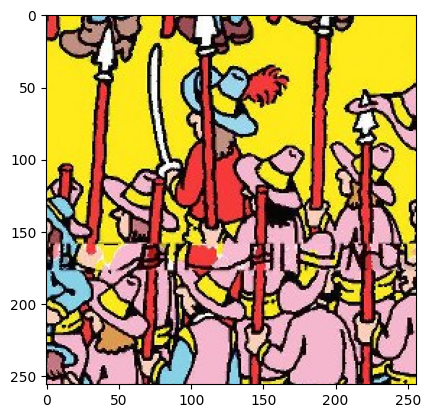


Tester: Task C solution seems OK


In [7]:
# implement your solution BELOW
def create_random_negative_sample(puzzle_image, waldo_bbox, im_out_size_yx):
    out_height, out_width = im_out_size_yx
    img_height, img_width, _ = puzzle_image.shape
    waldo_x, waldo_y, waldo_width, waldo_height = waldo_bbox

    random_start_y = np.random.randint(0, img_height - out_height + 1)
    random_start_x = np.random.randint(0, img_width - out_width + 1)

    crop_box = (random_start_x, random_start_y, random_start_x + out_width, random_start_y + out_height)
    waldo_box = (waldo_x, waldo_y, waldo_x + waldo_width, waldo_y + waldo_height)
    
    while not (crop_box[2] <= waldo_box[0] or crop_box[0] >= waldo_box[2] or crop_box[3] <= waldo_box[1] or crop_box[1] >= waldo_box[3]):
        random_start_y = np.random.randint(0, img_height - out_height + 1)
        random_start_x = np.random.randint(0, img_width - out_width + 1)

        crop_box = (random_start_x, random_start_y, random_start_x + out_width, random_start_y + out_height)
        waldo_box = (waldo_x, waldo_y, waldo_x + waldo_width, waldo_y + waldo_height)

    return puzzle_image[random_start_y:random_start_y + out_height,
                        random_start_x:random_start_x + out_width].copy()

result = create_random_negative_sample(puzzle_im, (bbox['bbox left'], bbox['bbox top'], bbox['bbox width'], bbox['bbox height']), (256, 256))
print("shape:", result.shape)
print("dtype:", result.dtype)

plt.imshow(result)
plt.show()

# implement your solution ABOVE

tester.test('C', create_random_negative_sample)

###**D**: A tanító-, validációs- és tesztképek elkülönítése

Ebben a feladatban elkülönítjük a betanításhoz, validációhoz és teszteléshez használt képrejtvényeket. Emellett, a kivágott Vili fejek közül is elkülönítünk néhányat validációs és tesztelési célokra, nem használjuk fel mindet a tanításhoz, hiszen ekkor nem tudnánk a tanítás végeztével, hogy korábban nem látott Vili fejkre hogyan reagál a háló.

- Készítsd el a `puzzle_image_names_train`, `puzzle_image_names_val`, `puzzle_image_names_test` listákat, melyek a képrejtvények fájlneveit (sztringek) tartalmazzák, úgy, ahogy azok a szótár kulcsai közt szerepeltek. Kerüljön 8 képrejtvény a tanítóhalmazba, 4 a validációs halmazba és 10 a teszthalmazba! A listák tartalma, természetesen, legyen diszjunkt.

- Hasonlóan, készítsd el a `waldo_head_image_names_train`, `waldo_head_image_names_val`, `waldo_head_image_names_test` sztring listákat is, melyek a kivágott Vili fejeket tartalmazó képek fájlneveit tartalmazzák, úgy, ahogy azok a szótár kulcsai közt szerepeltek. Kerüljön 8 Vili fej a tanítóhalmazba, 2-2 pedig a validációs- és a teszthalmazba! A listák tartalma, természetesen, legyen diszjunkt.


In [8]:
# implement your solution BELOW
import random

puzzles = list(puzzle_images_dict.keys())
waldos = list(waldo_head_images_dict.keys())

random.shuffle(puzzles)
random.shuffle(waldos)

puzzle_image_names_train = puzzles[:8]
puzzle_image_names_val = puzzles[8:12]
puzzle_image_names_test = puzzles[12:22]
 
waldo_head_image_names_train = waldos[:8]
waldo_head_image_names_val = waldos[8:10]
waldo_head_image_names_test = waldos[10:12]

# implement your solution ABOVE

tester.test('D', puzzle_image_names_train, puzzle_image_names_val, puzzle_image_names_test, \
                 waldo_head_image_names_train, waldo_head_image_names_val, waldo_head_image_names_test)


Tester: Task D solution seems OK


###**E**: Az adat-iterátorok létrehozása a neuronháló betanításához, adat-augmentáció

Az első házi feladathoz és zárthelyihez hasonlóan, ezúttal is iterátorokkal oldjuk meg a neuronhálónk betanítását. Ebben a részfeladatban **elő kell állítanod három iterátor objektumot** `dataloader_train`, `dataloader_val` és `dataloader_test` néven, melyek véletlenszerű szintetikus input képek kötegeit és az azokhoz tartozó bináris címkéket állítják elő. A képek elkészítéséhez, a B) és C) feladatokban implementált két függvényt kell segítségül hívnunk, a kettő közül minden generált kép esetén véletlenszerűen választva, 50-50% eséllyel. **Mindhárom iterátor a saját (tanító/validációs/teszt) halmazán dolgozzon**, azaz, amikor hívja a példageneráló függvényeket, az ezekből a halmazokból származó képrejtvényeket és Vili fej-képeket használja csak fel, azok közül véletlenszerűen választva! A pozitív példák generálásához javasolt a `waldo_head_scale` argumentumot a 0.3 és 0.8 értékek közti intervallumról  véletlenszerűen sorsolni. A negatív példák esetén a `waldo_bbox` paraméternél természetesen a megadott képrejtvényen valójában szereplő Vili bounding box-át kell megadni, hogy ki tudjuk őt szűrni a negatív képekről.

A képek esetén szükséges lesz a tengelyek sorrendjének átrendezése, mivel a csatornákat felsoroló tengely eddig hátul volt (_channel-last_ formátum: NHWC), de a PyTorch erre a tengelyre közvetlenül a kötegméret tengely után számít (_channel-first_ formátum: NCHW). Ebből kifolyólag, a visszaadott tenzorok alakja `(batch_size, 3, 128, 128)` és `(batch_size, 1)` lesz. Előbbi a színes képeket tartalmazza változatlan felbontással, utóbbi a képekhez tartozó bináris klasszifikációs címkéket. `batch_size` a mintaelemek számát adja meg, melyeket egyszerre, egy kötegben fog megkapni a neuronhálónk - ennek értéke lehet például 32.

Hangsúlyozandó, hogy az iterátorok a fent említett NumPy tömbökből (`np.ndarray`) nyert mintaelem-kötegeket már `torch.tensor` típusú objektumokként adják vissza (pontosabban, kételemű tuple-öket adnak vissza, melyekben `torch.tensor` objektumok lesznek). A PyTorch-al definiált neuronhálók betanításához már mindenképp PyTorch tenzorok szükségesek: az input tenzor és a bináris címkéket tartalmazó tenzor **adattípusa** is 4 bájtos lebegőpontos típus (`torch.float32`) kell, hogy legyen.

A neuronhálónk egy előtanított mély konvolúciós hálón alapul majd, ezért a képeinket olyan formátumra kell hoznunk, amilyet a háló a betanításakor látott. Az eredetileg [0, 255] intervallumbeli értékeket tartalmazó képeinket először a [0, 1] intervallumra kell leskáláznunk, majd színcsatornánként megadott átlag (`MOBILENET_MEANS`) és szórás (`MOBILENET_STDS`) értékekkel kell sztenderdizálnunk. Az iterátor által visszaadott képek színcsatornánként függetlenül vett átlaga tehát 0 körül, szórása pedig 1 körül lesz a helyes sztenderdizáció után.

Az iterátorok implementációja többféleképpen megoldható. Például, egyedi generátorral/iterátorral, vagy a `torch.utils.data` modul `Dataset` és `DataLoader` osztályai felhasználásával és esetleges származtatásával. Mivel ebben az esetben nincsen fix adatbázisunk, tetszőleges számban tudunk véletlen képkivágásokat generálni, ezért **az iterátorok** (vagy a `Dataset`) **hosszát manuálisan kell megadnunk** - ez fogja megadni egy epoch hosszát is a betanításkor. Nem érdemes ezt a számot néhány száz elemnél nagyobbra állítani.

**Adat-augmentáció:** Sajnos az adatbázisunk rendkívül kis méretű, így erre várhatóan könnyen túltanulna a hálónk, új tanítóadatot beszerezni pedig nincs lehetőségünk. Ezért, az adat-augmentálás technikájához kell fordulnunk. Az adat-augmentációt a B) és C) feladatban definiált függvények által generált képeken alkalmazzuk.

Alkalmazz véletlenszerű adat-augmentációt a **tanító** iterátorban, hogy csökkentsd a túltanulás valószínűségét! Az adat-augmentációs módszerek közt legyen kis méretékű transzláció (eltolás), forgatás, skálázás, zaj, illetve a kép színeinek torzítása! A validációs- és teszt-iterátorok ne alkalmazzank adat-augmentációt, hiszen ezeket kiértékeléshez fogjuk használni! Az adat-augmentációhoz javasolt (de nem kötelező) a `torchvision.transforms` modul eszközeit használni. Ennek segítségével a sztenderdizáció is megoldható. A használatára láthatsz példákat a fent említett notebook-ban / videóban és a PyTorch dokumentációjában is.



In [9]:

MOBILENET_MEANS = [0.485, 0.456, 0.406]
MOBILENET_STDS = [0.229, 0.224, 0.225]   # MobileNet v2 stats used for image normalization

# implement your solution BELOW
class Waldo_dataset(Dataset):
    def __init__(self, puzzle_keys, waldo_keys, puzzle_dict, waldo_dict, bbox_dict, length, waldo_transform, final_transform):
        self.puzzle_keys = puzzle_keys
        self.waldo_keys = waldo_keys
        self.puzzle_dict = puzzle_dict
        self.waldo_dict = waldo_dict
        self.bbox_dict = bbox_dict
        self.length = length
        self.waldo_transform = waldo_transform
        self.final_transform = final_transform

    def __len__(self):
        return self.length

    def __getitem__(self, idx):
        is_positive = random.random() < 0.5
        p_key = random.choice(self.puzzle_keys)
        p_img = self.puzzle_dict[p_key]

        if is_positive:
            w_key = random.choice(self.waldo_keys)
            w_img = self.waldo_dict[w_key]
            w_img = self.waldo_transform(w_img)
            if isinstance(w_img, torch.Tensor): #ha alkalmazodik a transform akkor tensor lesz:(
                w_img = w_img.permute(1, 2, 0).numpy()
            scale = random.uniform(0.3, 0.8)
            img = create_random_positive_sample(p_img, w_img, scale, (128, 128))
            label = 1
        else:
            bbox = self.bbox_dict[p_key] 
            img = create_random_negative_sample(p_img, (bbox['bbox left'], bbox['bbox top'], bbox['bbox width'], bbox['bbox height']), (128, 128))
            label = 0

        x = self.final_transform(img)
        y = torch.tensor(label, dtype=torch.float32).unsqueeze(0)
        return x, y
        
final_transform_none = transforms.v2.Compose([
    transforms.v2.ToImage(),
    transforms.v2.ToDtype(torch.float32, scale=True),
    transforms.v2.Normalize(mean=MOBILENET_MEANS, std=MOBILENET_STDS)
])
final_transform_train = transforms.v2.Compose([
    transforms.v2.ToImage(),
    transforms.v2.ToDtype(torch.float32, scale=True),
    transforms.v2.GaussianNoise(),
    transforms.v2.ColorJitter(brightness=0.1,contrast=0.1,saturation=0.1,hue=0.1),
    transforms.v2.Normalize(mean=MOBILENET_MEANS, std=MOBILENET_STDS)
])
waldo_transform_train = transforms.v2.Compose([
    transforms.v2.ToImage(),
    transforms.v2.ToDtype(torch.uint8),
    transforms.v2.RandomRotation(degrees=15),
    transforms.v2.RandomAffine(degrees=0, translate=(0.05, 0.05)),
    transforms.v2.RandomHorizontalFlip()
])

waldo_transform_none = transforms.v2.Identity()
        
dataset_train = Waldo_dataset(puzzle_image_names_train, waldo_head_image_names_train,puzzle_images_dict,waldo_head_images_dict,
                             puzzle_im_waldo_bboxes_dict,640,waldo_transform=waldo_transform_train,final_transform=final_transform_train);
dataset_val = Waldo_dataset(puzzle_image_names_val, waldo_head_image_names_val,puzzle_images_dict,waldo_head_images_dict,
                             puzzle_im_waldo_bboxes_dict,640,waldo_transform=waldo_transform_none,final_transform=final_transform_none);
dataset_test = Waldo_dataset(puzzle_image_names_test, waldo_head_image_names_test,puzzle_images_dict,waldo_head_images_dict,
                             puzzle_im_waldo_bboxes_dict,640,waldo_transform=waldo_transform_none,final_transform=final_transform_none)

dataloader_train = DataLoader(dataset_train, batch_size=32, shuffle=True)
dataloader_val = DataLoader(dataset_val, batch_size=32, shuffle=True)
dataloader_test = DataLoader(dataset_test, batch_size=32, shuffle=False)



# implement your solution ABOVE

tester.test('E', dataloader_train, dataloader_val, dataloader_test)

/home/szdani/.local/lib/python3.12/site-packages/torchvision/transforms/v2/functional/_type_conversion.py:14: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  output = torch.from_numpy(np.atleast_3d(inpt)).permute((2, 0, 1)).contiguous()



Tester: Task E solution seems OK


###**F**: Néhány augmentált kép kirajzolása az adat-iterátorból

Azért, hogy lássuk, a hálónk megfelelő inputot és címkéket fog kapni, mintavételezünk pár képet és címkét az E) feladatban elkészített iterátorokból és kirajzoljuk ezeket.
- Mintavételezz néhány képet és a hozzájuk tartozó címkéket a `dataloader_train` és `dataloader_val` iterátorokból, majd rajzold ki ezeket a képeket és írd föléjük a hozzájuk tartozó címkét (például "1")! Mivel az iterátorok a képeket normalizálják és megváltoztatják a tengelysorrendet is, a helyes kirajzoláshoz ezeket a transzformációkat vissza kell csinálni a kirajzolás előtt.

_**Megjegyzés:** Ha korábban nem tetted volna, itt tudod vizuálisan is ellenőrizni, hogy a B) és C) feladatok függvényei jól működnek-e. Továbbá, itt látod azt is, hogy az adat-augmentáció helyes-e, csak a tanító-iterátoron van-e jelen az, és hogy helyes kategóriacímkék kerülnek-e a képekhez._

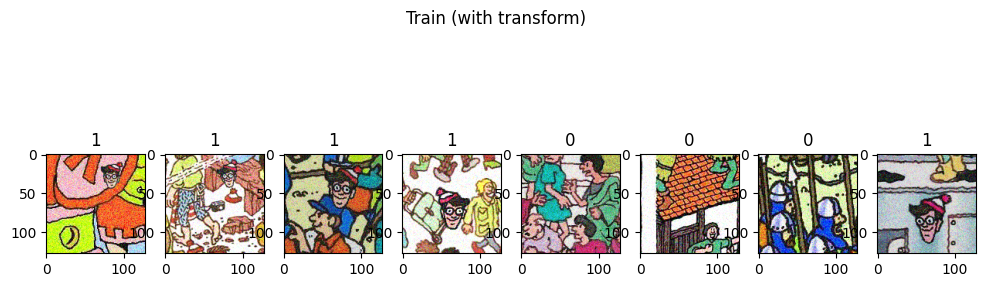

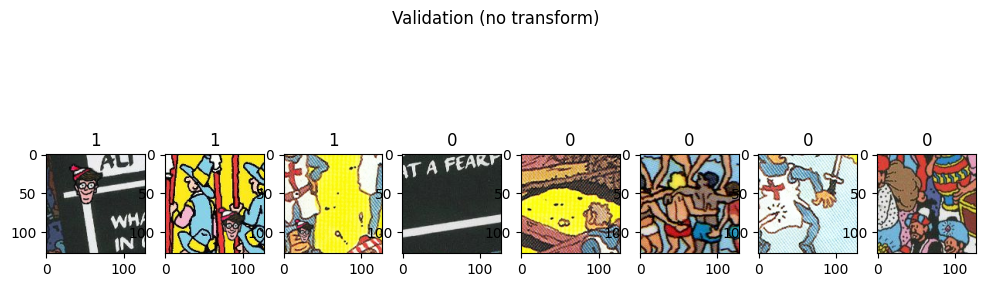

In [10]:
# implement your solution BELOW
def denormalize(img):
    means = torch.tensor(MOBILENET_MEANS).view(3, 1, 1)
    stds = torch.tensor(MOBILENET_STDS).view(3, 1, 1)
    return img * stds + means

def show_8(images, labels, title):
    images = denormalize(images) 
    images = images.permute(0, 2, 3, 1).clamp(0, 1).numpy()

    plt.figure(figsize=(12, 4))
    for i in range(8):
        plt.subplot(1, 8, i + 1)
        plt.imshow(images[i])
        plt.title(f"{int(labels[i].item())}")
    plt.suptitle(title)
    plt.show()

x_train, y_train = next(iter(dataloader_train))
show_8(x_train, y_train, title="Train (with transform)")

x_val, y_val = next(iter(dataloader_val))
show_8(x_val, y_val, title="Validation (no transform)")






###**G**: A konvolúciós háló definiálása bináris klasszifikációhoz

A konvolúciós hálónk alapját egy, az ImageNet adatbázison előtanított MobileNet v2 neuronháló adja. Ezt alapul véve (és a tanult súlyainak nagyrészét felhasználva) készítjük el a célfeladat megoldására alkalmas konvolúciós hálónkat, amit finomhangolunk az adatbázisunkon.

**Definiáld a bináris klasszifikációs feladathoz alkalmazandó neuronhálót megvalósító osztályt**, mely az általános `torch.nn.Module` osztály leszármazottja!

Töltsd be a MobileNet v2 neuronhálót előtanított súlyokkal, majd ennek egyik konvolúciós rétegéhez (például: `features[17].conv[3]`) fűzz hozzá egy kisméretű neuronhálót, melynek architektúrája alkalmas a feladatunk megoldására! A háló végén található aktivációs függvényre mindenképp figyelj oda!

Egy javaslat a hozzáfűzendő rétegekre (nem kötelező):
- Egy konvolúciós réteg nem túl nagyszámú (pl. 32) filterrel.
- Két teljesen összekötött réteg, ahol az utolsó neuronjainak számát a feladat határozza meg.
- A rétegek közt aktivációs függvények vannak (pl. ReLU).

**Példányosítsd az új osztályt** és add értékül a `finetuned_model` nevű változónak a példányt!

_**Megjegyzés:** A MobileNet háló súlyainak befagyasztása itt nem biztos, hogy jó ötlet, hiszen a Vili képrejtvények stílusa eltérhet attól, amin a háló eredetileg tanítva lett._

In [11]:
# implement your solution BELOW
class finetuned_bin(nn.Module):
    def __init__(self):
        super().__init__()
        self.mobile_net = torch.hub.load('pytorch/vision', 'mobilenet_v2', weights='MobileNet_V2_Weights.IMAGENET1K_V1')
        self.mobile_net_output = None
        self.mobile_net.features[17].conv[3].register_forward_hook(self._hook)                    

        self.extra_conv = nn.Conv2d(320, 40, kernel_size = (3,3), padding='same') 
        self.extra_fc = nn.Sequential(
            nn.ReLU(),
            nn.Linear(40 * 4 * 4, 20),
            nn.ReLU(),
            nn.Linear(20, 1),
            nn.Sigmoid()
        )

    def _hook(self, module, input, output):
        self.mobile_net_output = output

    def forward(self, x):
        _ = self.mobile_net(x)
        out = self.extra_conv(self.mobile_net_output)
        out = out.reshape(out.size(0), -1)
        out = self.extra_fc(out)
        return out
    



finetuned_model = finetuned_bin()


# implement your solution ABOVE

tester.test('G', finetuned_model)


Tester: Task G solution seems OK


Using cache found in /home/szdani/.cache/torch/hub/pytorch_vision_main


###**H**: A háló betanítása bináris klasszifikációs feladatra

**Tanítsd be az** `finetuned_model` **neuronhálót** a tanítópéldákon a `dataloader_train` iterátor segítségével és alkalmazd a `dataloader_val` iterátort a validációhoz!

Alkalmazd a bináris klasszifikációkor szokásosan használt **binary cross-entropy költséget**! **Mérd le minden epoch-ban a tanító- és a validációs példákon a költségeket, majd a tanítás végeztével rajzold ki ezeknek az értékeknek a tanítás során való alakulását egy közös grafikonon!** A grafikonon a jelmagyarázat meglétére és a görbék könnyű elkülöníthetőségére figyelj ezúttal is! **Számold ki az _accuracy_ (pontosság) metrikát minden epoch-ban a tanító- és a validációs példákon** és jelöld ezek alakulását is a grafikonon!

A tanítást az **early stopping** technika állítsa le! Amennyiben adott számú epoch-on keresztül (`patience`) nem javul a validációs költség, érjen véget a betanítás és **állítsuk vissza a `finetuned_model` súlyait abból az epoch-ból, amikor a legjobb volt a validációs költség!** Mindez automatikusan történjen!

A betanítást követően **számold ki a költséget és az _accuracy_ metrikát a teszt-iterátorból mintavételezett példahalmazon is** és add értékül a kapott számot a `test_bce` és `test_acc` változóknak!

_**Megjegyzés:** Mivel ezúttal nincsenek fix tanító-, validációs- és teszthalmazok a generált képrészleteket tekintve, az iterátorok hosszával, vagy manuálisan lehet szabályozni, hogy hány példán mérjük le a költségeket/metrikákat._

Using cache found in /home/szdani/.cache/torch/hub/pytorch_vision_main


Epoch #0, tr loss: 0.3542748987674713, val loss: 42.19445037841797, tr acc: 0.8109375238418579, val acc: 0.5296875238418579
    Early stopping: Best model updated.
Epoch #1, tr loss: 0.0963268131017685, val loss: 0.11354319006204605, tr acc: 0.965624988079071, val acc: 0.9750000238418579
    Early stopping: Best model updated.
Epoch #2, tr loss: 0.18269123136997223, val loss: 0.08564849197864532, tr acc: 0.9593750238418579, val acc: 0.979687511920929
    Early stopping: Best model updated.
Epoch #3, tr loss: 0.1194535344839096, val loss: 0.0749281644821167, tr acc: 0.9671875238418579, val acc: 0.979687511920929
    Early stopping: Best model updated.
Epoch #4, tr loss: 0.1460638791322708, val loss: 0.057139646261930466, tr acc: 0.949999988079071, val acc: 0.987500011920929
    Early stopping: Best model updated.
Epoch #5, tr loss: 0.11158814281225204, val loss: 0.07856346666812897, tr acc: 0.965624988079071, val acc: 0.9828125238418579
Epoch #6, tr loss: 0.12344066053628922, val loss: 

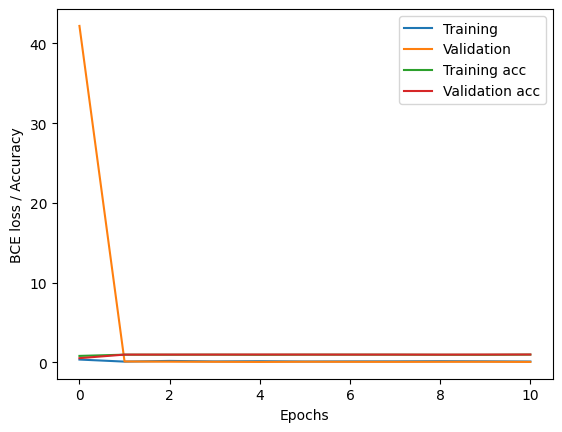


Tester: Task H solution seems OK


In [83]:
# implement your solution BELOW
@torch.no_grad()
def acc_fn(y_hat, y_true):
    preds = (y_hat >= 0.5).float()
    correct = (preds == y_true).float().sum()
    accuracy = correct / y_true.size(0)
    return accuracy
    
finetuned_model = finetuned_bin()

loss_fn = nn.BCELoss()
TARGET_DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
n_epochs = 20
learning_rate = 0.002
optimizer = torch.optim.Adam(finetuned_model.parameters(), lr=learning_rate)
train_losses = []
val_losses = []
train_accuracy = []
val_accuracy = []
best_finetuned_model = None
best_val_loss = float('inf')
early_stopping_patience = 5
last_early_stopping_update_ep_idx = 0

for epoch_idx in range(n_epochs):
    finetuned_model.train()
    train_epoch_losses = []
    train_epoch_accs = []

    for x, y in dataloader_train:
        x = x.to(TARGET_DEVICE)
        y = y.to(TARGET_DEVICE)

        optimizer.zero_grad()
        y_hat = finetuned_model(x)
        loss = loss_fn(y_hat, y)
        acc = acc_fn(y_hat, y)
        train_epoch_losses.append(loss.detach().to('cpu'))
        train_epoch_accs.append(acc.to('cpu'))
        loss.backward()
        optimizer.step()

    train_epoch_losses = torch.tensor(train_epoch_losses)
    train_epoch_accs = torch.tensor(train_epoch_accs)
    avg_tr_epoch_loss = train_epoch_losses.mean()
    avg_tr_epoch_acc = train_epoch_accs.mean()
    train_losses.append(avg_tr_epoch_loss)
    train_accuracy.append(avg_tr_epoch_acc)

    finetuned_model.eval()
    val_epoch_losses = []
    val_epoch_accs = []

    for x, y in dataloader_val:
        x = x.to(TARGET_DEVICE)
        y = y.to(TARGET_DEVICE)

        with torch.no_grad():
            y_hat = finetuned_model(x)

        loss = loss_fn(y_hat, y)
        acc = acc_fn(y_hat, y)
        val_epoch_losses.append(loss.to('cpu'))
        val_epoch_accs.append(acc.to('cpu'))

    val_epoch_losses = torch.tensor(val_epoch_losses)
    val_epoch_accs = torch.tensor(val_epoch_accs)
    avg_val_epoch_loss = val_epoch_losses.mean()
    avg_val_epoch_acc = val_epoch_accs.mean()
    val_losses.append(avg_val_epoch_loss)
    val_accuracy.append(avg_val_epoch_acc)

    print(f"Epoch #{epoch_idx}, tr loss: {avg_tr_epoch_loss}, val loss: {avg_val_epoch_loss}, tr acc: {avg_tr_epoch_acc}, val acc: {avg_val_epoch_acc}")

    if avg_val_epoch_loss < best_val_loss:
        best_val_loss = avg_val_epoch_loss
        finetuned_model = copy.deepcopy(finetuned_model).to('cpu')
        last_early_stopping_update_ep_idx = epoch_idx
        print("    Early stopping: Best model updated.")

    if last_early_stopping_update_ep_idx + early_stopping_patience < epoch_idx:
        print("Training is terminated by early stopping.")
        break

print("Best model weights are restored.")
finetuned_model = finetuned_model.to(TARGET_DEVICE)

test_pred_y_cat = []
test_y_cat = []

with torch.no_grad():
    _, (test_x, test_y) = next(enumerate(dataloader_test))
    test_x = test_x.to(TARGET_DEVICE)
    test_pred_y_cat_batch_npy = (finetuned_model(test_x) >= 0.5).int().to('cpu').numpy()
    test_pred_y_cat.append(test_pred_y_cat_batch_npy)
    test_y_cat.append(test_y.numpy())
test_pred_y_cat = np.concatenate(test_pred_y_cat, axis=0)
test_y_cat = np.concatenate(test_y_cat, axis=0)

with torch.no_grad():
    test_pred_ys = []
    test_ys = []
    for x, y in dataloader_test:
        y_hat = finetuned_model(x.to(TARGET_DEVICE)).to('cpu')
        test_pred_ys.append(y_hat)
        test_ys.append(y)

    test_pred_ys = torch.cat(test_pred_ys, dim=0)
    test_ys = torch.cat(test_ys, dim=0)
    test_bce = loss_fn(test_pred_ys, test_ys)
    test_acc = acc_fn(test_pred_ys, test_ys)
    print(f"Test metrics - BCE: {test_bce}, acc: {test_acc}")

for sample_idx in range(10):
    print(f"Test sample #{sample_idx}, pred vs true label: {test_pred_y_cat[sample_idx]} vs {test_y_cat[sample_idx]}")

plt.plot(train_losses, label='Training')
plt.plot(val_losses, label='Validation')
plt.plot(train_accuracy, label='Training acc')
plt.plot(val_accuracy, label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('BCE loss / Accuracy')
plt.legend()
plt.show()

# implement your solution ABOVE

tester.test('H', test_bce, test_acc)

###**I**: Az adat-iterátorok létrehozása a neuronháló kiértékeléséhez egy-egy teljes méretű Vili képrejtvényen

Vilit úgy próbáljuk meg megkeresni a nagy képeken, hogy **felosztjuk a képeket** akkora **ablakokra** (128 x 128), amekkorán a neuronhálót betanítottuk a Vilit tartalmazó és nem tartalmazó képrészletek klasszifikálására, **majd a betanult neuronhálóval klasszifkáljuk a felosztott képet**, ablakonként haladva.

A nagy képek ilyen módon történő **felosztására és bejárására egy új adat-iterátort definiálunk**, mely sorfolytonosan bejár egy megadott Vili képrejtvényt és szükséges méretű képrészleteket vág ki, majd ad vissza sorban. A képrészletek mellett azok bináris címkéjét is visszaadja az iterátor, aszerint, hogy az éppen soron következő képrészletnek van-e közös pixele a képrejtvényen található Vili bounding box-ával.

Készítsd el a `dataloader_puzzleimg_eval` iterátort, mely az egyik, teszthalmazban található Vili képrejtényen végigmegy és sorfolytonosan felsorolja a kép 128 x 128 pixeles felbontású szeleteit!  A szeletek lehetnek egy rács cellái, de kissé jobb eredmény érhető el, ha a szomszédos rács-cellák szélei átfedik egymást kissé - így Vili feje valamelyik kivágott képrészletben megtalálható lesz egészben. A képrészletekkel együtt az iterátor adja vissza azok bináris címkéit is, azaz 1 értéket, ha a képrészletnek van metszete Vili bounding boxával és 0 értéket, ha nincs! Az iterátor pontosan egy teljes képrejtvényen menjen végig!

**Az iterátor által visszaadott tenzorok alakja és adattípusa ugyanaz lesz, mint a tanításra használt iterátorok esetében**, a tengelysorrend-cserére és a normalizációra itt is figyelni kell. Az iterátorok implementációja többféleképpen megoldható. Például, egyedi generátorral/iterátorral, vagy a `torch.utils.data` modul `Dataset` és `DataLoader` osztályai felhasználásával és esetleges származtatásával. Adat-augmentációt ezúttal nem alkalmazunk, hiszen már csak kiértékeljük a betanított hálónkat.


In [84]:
# implement your solution BELOW
class puzzle_dataset(Dataset):
    def __init__(self,p_img,bbox):
        self.img = p_img
        self.bbox = (bbox['bbox left'], bbox['bbox top'], bbox['bbox width'], bbox['bbox height'])
        self.slots = []
        height, width, _ = p_img.shape
        size = 128
        x_coords = np.arange(0, width - size + 1 , 128)
        y_coords = np.arange(0, height - size + 1, 128)
        grid_x, grid_y = np.meshgrid(x_coords, y_coords)
        self.slots = list(zip(grid_x.ravel(), grid_y.ravel()))
    def __len__(self):
        return len(self.slots)
    def __getitem__(self,idx):
        x0, y0 = self.slots[idx]
        x1 = x0 + 128
        y1 = y0 + 128
        crop_box = (x0, y0, x1, y1)
        bx, by, bw, bh = self.bbox
        wx0, wy0, wx1, wy1 = bx, by, bx + bw, by + bh
        if x1 <= wx0 or x0 >= wx1 or y1 <= wy0 or y0 >= wy1:
            y = torch.tensor([0.0], dtype=torch.float32)
        else:
            y = torch.tensor([1.0], dtype=torch.float32)
        x = self.img[y0:y1, x0:x1, :]

        x = transforms.v2.Compose([
            transforms.v2.ToImage(),
            transforms.v2.ToDtype(torch.float32, scale=True),
            transforms.v2.Normalize(mean=MOBILENET_MEANS, std=MOBILENET_STDS)
        ])(x)
        return x, y

idx=3
puzzle_im_name = list(puzzle_images_dict.keys())[idx]
waldo_head_name = list(waldo_head_images_dict.keys())[idx]

puzzle_im = puzzle_images_dict[puzzle_im_name]
bbox = puzzle_im_waldo_bboxes_dict[puzzle_im_name]

dataset_puzzleimg = puzzle_dataset(puzzle_im,bbox)        

dataloader_puzzleimg_eval = DataLoader(dataset_puzzleimg, batch_size=1,shuffle=False)





# implement your solution ABOVE

tester.test('I', dataloader_puzzleimg_eval)


Tester: Task I solution seems OK


###**J**: A háló kiértékelése a nagy méretű Vili képek képrészletein, Vili detektálása

Alkalmazd a fenti iterátort egy szabadon választott Vili képrejtvényen Vili megkeresésére! Állítsd elő az alábbi négy grafikont:
- **Rajzold ki a választott képrejtvényt Vili igazi bounding box-ával**!
- **Nyerd ki az iterátorból az összes képrészlet igazi címkéjét, majd formáld át úgy a tömbbe rendezett címkéket egy mátrixszá,** hogy ha kirajzolod a mátrixot, a képpel az összevethető és látszik, hogy a képen hol található meg Vili! Rajzold is ki ezt a mátrixot!
- **Nyerd ki az iterátorból az összes képrészletet, becsüld a címkéjüket a betanított hálóval, majd formáld át úgy a tömbbe rendezett becsült címkéket egy mátrixszá,** hogy ha kirajzolod a mátrixot, a képpel az összevethető és látszik, hogy hol milyen valószínűségeket sejt Vili jelenlétére a háló! Rajzold is ki ezt a mátrixot!
- **Rajzold ki az előző mátrixnak egy olyan változatát, ahol csak a maximális elem értékét tartod meg,** az összes többi elem értékét nullára állítod!

Példát a kirajzolandó grafikonra a Canvas-ban, a "HF2 GYIK" fórumon találsz.

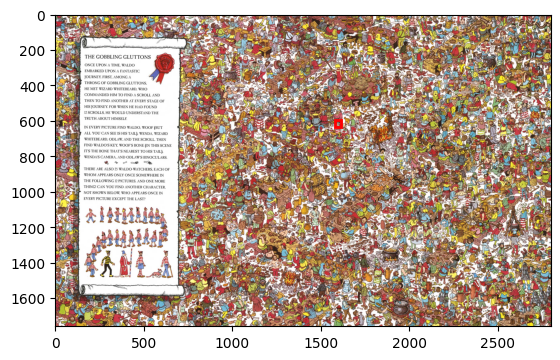

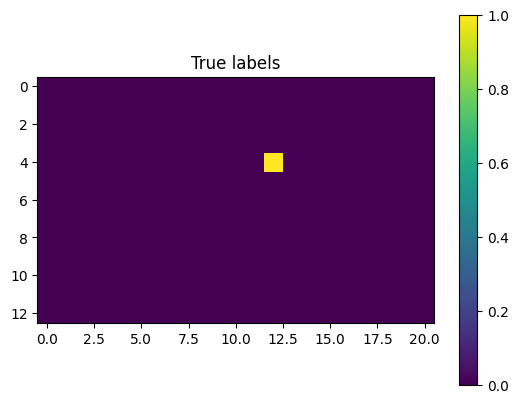

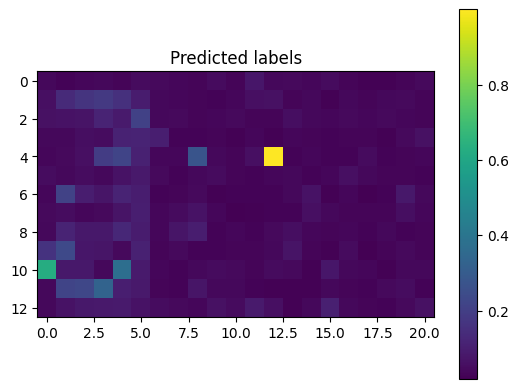

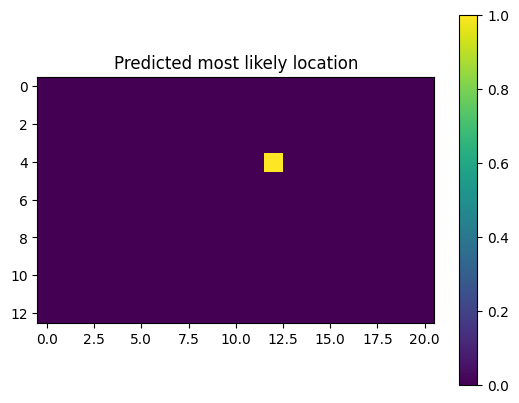

In [85]:
fig, ax = plt.subplots()
ax.imshow(puzzle_im)
rect = patches.Rectangle(
    (bbox['bbox left'], bbox['bbox top']),
    bbox['bbox width'], bbox['bbox height'],
    linewidth=2, edgecolor='red', facecolor='none')
ax.add_patch(rect)
plt.show()

true_labels = []
for _, y in dataloader_puzzleimg_eval:
    true_labels.append(y.item())

grid_h = puzzle_im.shape[0] // 128
grid_w = puzzle_im.shape[1] // 128
true_label_matrix = np.array(true_labels).reshape((grid_h, grid_w))
plt.imshow(true_label_matrix, cmap='viridis')
plt.title("True labels")
plt.colorbar()
plt.show()

finetuned_model.eval()
predicted_labels = []
for x, _ in dataloader_puzzleimg_eval:
    x = x.to(TARGET_DEVICE)
    pred = finetuned_model(x)
    predicted_labels.append(pred.item())

pred_label_matrix = np.array(predicted_labels).reshape((grid_h, grid_w))
plt.imshow(pred_label_matrix, cmap='viridis')
plt.title("Predicted labels")
plt.colorbar()
plt.show()


most_likely_idx = np.argmax(pred_label_matrix)
most_likely_x = most_likely_idx // grid_w
most_likely_y = most_likely_idx % grid_w 
most_likely_matrix = np.zeros((grid_h, grid_w))
most_likely_matrix[most_likely_x,most_likely_y] = 1
plt.imshow(most_likely_matrix, cmap='viridis')
plt.title("Predicted most likely location")
plt.colorbar()
plt.show()

